# Здание 1

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### 1.1. Разбейте данные на обучение и тест

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(8, input_shape=(8, ), activation='relu', name='dense_1'))

model.add(Dense(8, activation='relu', name='dense_2'))

model.add(Dense(8, activation='relu', name='dense_3'))

#model.add(Dense(32, activation='relu', name='dense_4'))

#model.add(Dense(16, activation='relu', name='dense_5'))
#model.add(Dense(64, activation='relu', name='dense_4'))
model.add(Dense(1, activation='linear', name='dense_output'))
'''
model.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
'''


"\nmodel.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))\nmodel.add(Dense(64, activation='relu', name='dense_2'))\nmodel.add(Dense(1, activation='linear', name='dense_output'))\n"

#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [16]:
from keras.optimizers import Adam

opt = Adam(lr=0.00001)

model.compile(optimizer=opt, loss='mse', metrics='mae')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_output (Dense)        (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.

In [17]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm_train = mms.fit_transform(X_train)
X_norm_test = mms.fit_transform(X_test)

In [18]:
%%time
model.fit(X_norm_train, y_train, validation_data=(X_norm_test, y_test), epochs=300)

Epoch 1/300
516/516 [==============================] - 2s 2ms/step - loss: 5.9467 - mae: 2.1449 - val_loss: 5.7550 - val_mae: 2.1088
Epoch 2/300
516/516 [==============================] - 1s 2ms/step - loss: 5.8541 - mae: 2.1237 - val_loss: 5.6667 - val_mae: 2.0882
Epoch 3/300
516/516 [==============================] - 1s 3ms/step - loss: 5.7636 - mae: 2.1026 - val_loss: 5.5791 - val_mae: 2.0675
Epoch 4/300
516/516 [==============================] - 2s 3ms/step - loss: 5.6696 - mae: 2.0803 - val_loss: 5.4856 - val_mae: 2.0449
Epoch 5/300
516/516 [==============================] - 1s 2ms/step - loss: 5.5652 - mae: 2.0553 - val_loss: 5.3789 - val_mae: 2.0189
Epoch 6/300
516/516 [==============================] - 1s 2ms/step - loss: 5.4401 - mae: 2.0252 - val_loss: 5.2547 - val_mae: 1.9883
Epoch 7/300
516/516 [==============================] - 1s 2ms/step - loss: 5.2750 - mae: 1.9848 - val_loss: 5.0889 - val_mae: 1.9469
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - 

## 1.5. Сделайте вывод, хорошо ли модель обучается?
Если модель обучается плохо, можете внести изменения в работу.

## 1.6. Сделайте предсказания на тестовых данных

In [19]:
print(model.predict(X_norm_test))

129/129 [==============================] - 0s 1ms/step
[[2.1571078]
 [2.9752314]
 [2.0195217]
 ...
 [1.0241958]
 [2.7547464]
 [2.260645 ]]


## 1.7. Посчитайте метрику качества на тестовых данных

In [20]:
mse_nn, mae_nn = model.evaluate(X_norm_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 1ms/step - loss: 0.5859 - mae: 0.5486
Mean squared error on test data:  0.5859202742576599
Mean absolute error on test data:  0.5485935211181641


# Здание 2

In [ ]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Github/Dataset")))

random.shuffle(imagePaths)

In [ ]:
# цикл по изображениям
from tqdm import tqdm
for imagePath in tqdm(imagePaths):
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

100%|██████████| 10000/10000 [31:38<00:00,  5.27it/s]


In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=1000)

Epoch 1/80
8/8 [==============================] - 3s 346ms/step - loss: 1.5681 - accuracy: 0.2748 - val_loss: 1.4872 - val_accuracy: 0.3640
Epoch 2/80
8/8 [==============================] - 3s 317ms/step - loss: 1.4627 - accuracy: 0.3927 - val_loss: 1.4211 - val_accuracy: 0.4228
Epoch 3/80
8/8 [==============================] - 2s 239ms/step - loss: 1.4010 - accuracy: 0.4431 - val_loss: 1.3746 - val_accuracy: 0.4680
Epoch 4/80
8/8 [==============================] - 2s 239ms/step - loss: 1.3584 - accuracy: 0.4763 - val_loss: 1.3335 - val_accuracy: 0.5020
Epoch 5/80
8/8 [==============================] - 2s 228ms/step - loss: 1.3203 - accuracy: 0.4955 - val_loss: 1.2985 - val_accuracy: 0.5164
Epoch 6/80
8/8 [==============================] - 2s 226ms/step - loss: 1.2936 - accuracy: 0.5087 - val_loss: 1.2814 - val_accuracy: 0.5124
Epoch 7/80
8/8 [==============================] - 2s 228ms/step - loss: 1.2663 - accuracy: 0.5163 - val_loss: 1.2543 - val_accuracy: 0.5200
Epoch 8/80
8/8 [====

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
79/79 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

   buildings       0.44      0.63      0.52       505
      forest       0.80      0.73      0.76       511
    mountain       0.72      0.56      0.63       491
         sea       0.61      0.47      0.53       501
      street       0.59      0.66      0.62       492

    accuracy                           0.61      2500
   macro avg       0.63      0.61      0.61      2500
weighted avg       0.63      0.61      0.61      2500



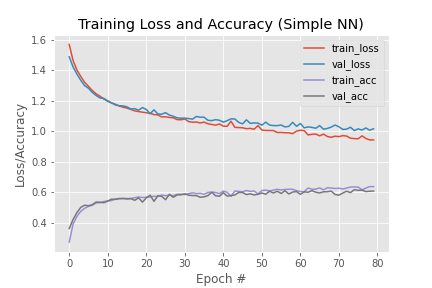

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))


In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


# Проверка обученной модели пользовательскими данными

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving 20108.jpg to 20108.jpg


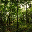

In [ ]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [ ]:
# загружаем модель и бинаризатор меток
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 66ms/step
[[0.00954599 0.95961356 0.00253107 0.01216975 0.01613952]]


In [ ]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[  8,  62,  49],
        [  6,  63,  48],
        [  0,  52,  37],
        ...,
        [ 49, 100,  96],
        [101, 158, 155],
        [ 57, 116, 112]],

       [[  3,  61,  50],
        [ 27,  89,  75],
        [  0,  68,  48],
        ...,
        [ 21,  75,  68],
        [  0,  34,  29],
        [ 61, 121, 115]],

       [[ 60, 124, 118],
        [ 38, 110,  98],
        [ 40, 130, 107],
        ...,
        [  4,  61,  52],
        [ 71, 128, 119],
        [ 48, 108,  98]],

       ...,

       [[  0,   1,   7],
        [  1,  13,  17],
        [ 13,  19,  24],
        ...,
        [ 19,  34,  37],
        [ 10,  25,  28],
        [  3,  20,  23]],

       [[ 22,  45,  47],
        [ 34,  55,  57],
        [  6,  23,  26],
        ...,
        [ 23,  35,  39],
        [  3,  15,  19],
        [  2,  17,  20]],

       [[  8,  33,  35],
        [ 43,  68,  70],
        [ 30,  51,  52],
        ...,
        [ 16,  27,  31],
        [  7,  19,  23],
        [ 15,  27,  31]]

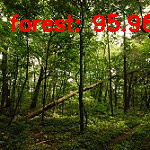

In [ ]:
# показываем выходное изображение
cv2_imshow(output)